# Keras ResNet classifier for CIFAR10 test
ResNet network for CIFAR10 network test

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.allow_growth = True
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.9)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

print('num train:%d num val:%d' % (num_train, num_val))
data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)
num train:45000 num val:5000


## test with resnet20
resnet20 is inffered in the ResNet paper.

In [10]:
from classifiers.ResNet import ResNet20ForCIFAR10
from keras import losses
from keras import optimizers

weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet20 = ResNet20ForCIFAR10(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=False)
resnet20.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet20.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 16)   432         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 32, 32, 16)   64          conv2d_22[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 32, 32, 16)   0           batch_normalization_22[0][0]     
__________________________________________________________________________________________________
conv2d_23 

In [11]:
%%time
from cifar10_solver import *
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    new_lr = lr
    if epoch <= 91:
        pass
    elif epoch > 91 and epoch <= 137:
        new_lr = lr * 0.1
    else:
        new_lr = lr * 0.01
    print('new lr:%.2e' % new_lr)
    return new_lr 

reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet20, data)
history = solver.train(epochs=182, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/182
new lr:1.00e-01
352/352 [==============================] - 33s 94ms/step - loss: 1.8707 - acc: 0.3359 - val_loss: 1.8481 - val_acc: 0.3656
Epoch 2/182
new lr:1.00e-01
352/352 [==============================] - 28s 80ms/step - loss: 1.4027 - acc: 0.5196 - val_loss: 1.4507 - val_acc: 0.5212
Epoch 3/182
new lr:1.00e-01
352/352 [==============================] - 28s 81ms/step - loss: 1.1617 - acc: 0.6150 - val_loss: 1.1410 - val_acc: 0.6184
Epoch 4/182
new lr:1.00e-01
352/352 [==============================] - 28s 80ms/step - loss: 0.9948 - acc: 0.6838 - val_loss: 1.2639 - val_acc: 0.5912
Epoch 5/182
new lr:1.00e-01
352/352 [==============================] - 28s 79ms/step - loss: 0.8695 - acc: 0.7305 - val_loss: 1.1679 - val_acc: 0.6476
Epoch 6/182
new lr:1.00e-01
352/352 [==============================] - 27s 78ms/step - loss: 0.7950 - acc: 0.7605 - val_loss: 0.9494 - val_acc: 0.7158
Epoch 7/182
new lr:1.00e-01
352/352 [============================

Epoch 55/182
new lr:1.00e-01
352/352 [==============================] - 25s 72ms/step - loss: 0.4751 - acc: 0.9075 - val_loss: 0.9297 - val_acc: 0.7860
Epoch 56/182
new lr:1.00e-01
352/352 [==============================] - 25s 72ms/step - loss: 0.4772 - acc: 0.9048 - val_loss: 0.7774 - val_acc: 0.8184
Epoch 57/182
new lr:1.00e-01
352/352 [==============================] - 25s 72ms/step - loss: 0.4698 - acc: 0.9086 - val_loss: 0.8144 - val_acc: 0.8238
Epoch 58/182
new lr:1.00e-01
352/352 [==============================] - 26s 73ms/step - loss: 0.4720 - acc: 0.9072 - val_loss: 0.6963 - val_acc: 0.8452
Epoch 59/182
new lr:1.00e-01
352/352 [==============================] - 25s 72ms/step - loss: 0.4705 - acc: 0.9096 - val_loss: 0.7786 - val_acc: 0.8264
Epoch 60/182
new lr:1.00e-01
352/352 [==============================] - 26s 74ms/step - loss: 0.4693 - acc: 0.9091 - val_loss: 0.7156 - val_acc: 0.8374
Epoch 61/182
new lr:1.00e-01
352/352 [==============================] - 26s 73ms/step - 

Epoch 109/182
new lr:1.00e-02
352/352 [==============================] - 28s 80ms/step - loss: 0.2285 - acc: 0.9825 - val_loss: 0.4748 - val_acc: 0.9192
Epoch 110/182
new lr:1.00e-02
352/352 [==============================] - 29s 82ms/step - loss: 0.2244 - acc: 0.9833 - val_loss: 0.4892 - val_acc: 0.9182
Epoch 111/182
new lr:1.00e-02
352/352 [==============================] - 30s 86ms/step - loss: 0.2217 - acc: 0.9839 - val_loss: 0.4839 - val_acc: 0.9182
Epoch 112/182
new lr:1.00e-02
352/352 [==============================] - 30s 86ms/step - loss: 0.2181 - acc: 0.9834 - val_loss: 0.4994 - val_acc: 0.9166
Epoch 113/182
new lr:1.00e-02
352/352 [==============================] - 30s 86ms/step - loss: 0.2150 - acc: 0.9844 - val_loss: 0.4723 - val_acc: 0.9198
Epoch 114/182
new lr:1.00e-02
352/352 [==============================] - 30s 86ms/step - loss: 0.2115 - acc: 0.9850 - val_loss: 0.4827 - val_acc: 0.9178
Epoch 115/182
new lr:1.00e-02
352/352 [==============================] - 30s 85ms/

352/352 [==============================] - 22s 63ms/step - loss: 0.1349 - acc: 0.9954 - val_loss: 0.4817 - val_acc: 0.9206
Epoch 163/182
new lr:1.00e-03
352/352 [==============================] - 23s 66ms/step - loss: 0.1334 - acc: 0.9964 - val_loss: 0.4820 - val_acc: 0.9212
Epoch 164/182
new lr:1.00e-03
352/352 [==============================] - 24s 69ms/step - loss: 0.1333 - acc: 0.9959 - val_loss: 0.4799 - val_acc: 0.9220
Epoch 165/182
new lr:1.00e-03
352/352 [==============================] - 24s 67ms/step - loss: 0.1337 - acc: 0.9961 - val_loss: 0.4809 - val_acc: 0.9206
Epoch 166/182
new lr:1.00e-03
352/352 [==============================] - 24s 69ms/step - loss: 0.1328 - acc: 0.9963 - val_loss: 0.4829 - val_acc: 0.9218
Epoch 167/182
new lr:1.00e-03
352/352 [==============================] - 24s 68ms/step - loss: 0.1323 - acc: 0.9962 - val_loss: 0.4847 - val_acc: 0.9210
Epoch 168/182
new lr:1.00e-03
352/352 [==============================] - 23s 66ms/step - loss: 0.1320 - acc: 0.9

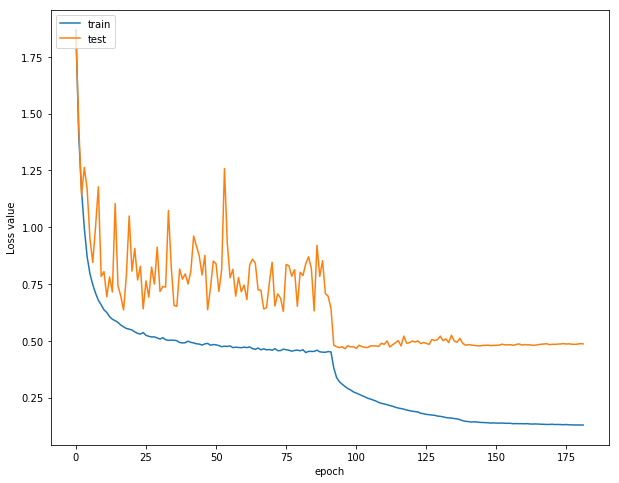

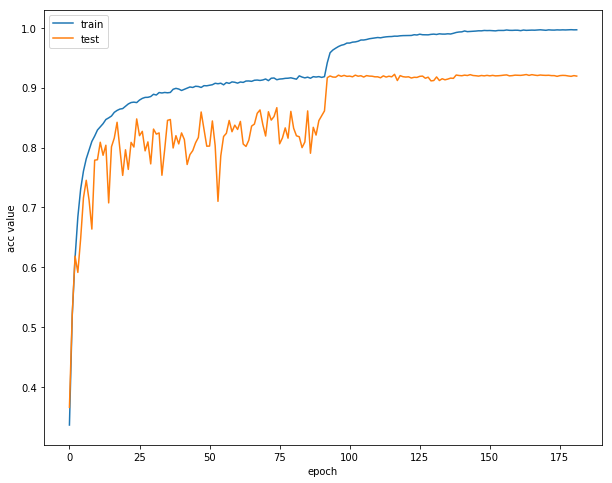

In [12]:
# plot loss and acc 
plot_history(history)

In [13]:
solver.test()

10000/10000 [==============================] - 3s 330us/step
test data loss:0.50 acc:0.9125
